In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

### From Seaborn load iris dataset & save it in iris dataframe

In [3]:
iris=sns.load_dataset('iris')

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


There are 150 rows and 5 columns,basically the problem we're going to address is, based on given columns namely sepal length, sepal width, petal length and petal width we are going to find species.
* Those 4 columns are independent attribute and species is dependent attribute.
* And these 4 columns are continuous features or attribute, species is categorical attribute.

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


By default the number of records that displayed is 5, we can want to return 10 recods-> iris.head(10)

### Find the no. of rows & columns in the dataset

In [6]:
iris.shape

(150, 5)

In [7]:
iris['species'].unique()  

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### finding categories in columns

.unique()-->finds different categories present in column

In [8]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
iris['petal_width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [10]:
iris['petal_width'].mean()

1.199333333333334

In [11]:
iris['petal_width'].max()

2.5

In [12]:
iris['petal_width'].min()

0.1

## Data Visualization 

### Scatter plot

Text(0.5, 1.0, 'Scatter plot on Iris Dataset')

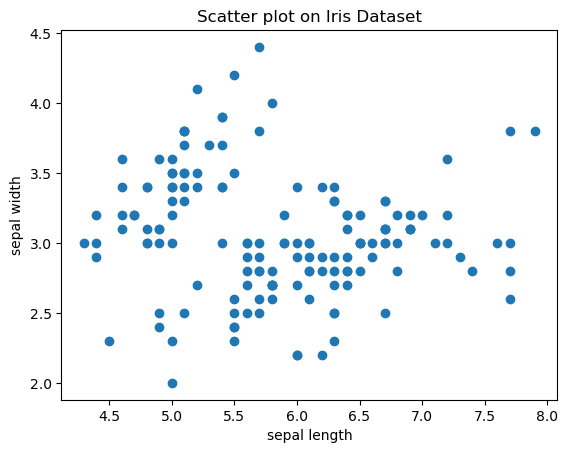

In [13]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Scatter plot on Iris Dataset')

Text(0.5, 1.0, 'Scatter plot on Iris Dataset')

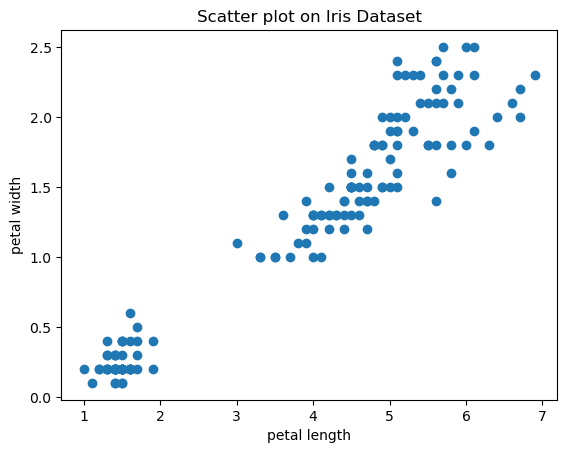

In [14]:
plt.scatter(iris['petal_length'],iris['petal_width'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Scatter plot on Iris Dataset')

From above grapgh we can see that petal length is directly proportional to petal width

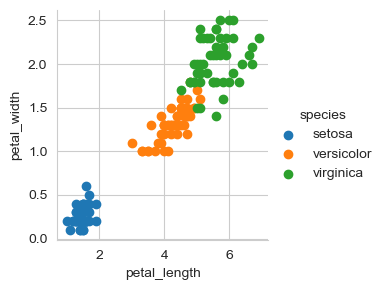

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue="species")\
.map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.show()

Setosa have shorter petal length and shorter petal width.And also setosa is really far away from versicolor and virginica.
Virginica have max petal length and petal width.

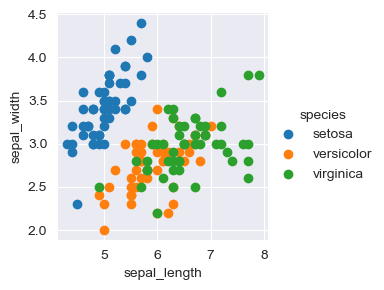

In [16]:
sns.set_style('darkgrid')              #facetgrid-->used for multiplots
sns.FacetGrid(iris, hue="species")\
.map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.show()

From this plot we can see that, there is some relationship between versicolor and virginica. setosa is different from 2 off them.

### Pair Plots

hue='species'--> for diff species diff color.
height=2-->dimention of perticular plot.
diag_kind='hist'-->create histogram or distributions for diagonals. ex:x1/x1,x2/x2,x3/x3,x4/x4
Pair plot is similar to scatter plot but it gives plot between all the set of features.

Sepal length Yaxis: Orange and green are either overlaping or close to each other but when we see setosa, it is far away.

Petal length vs petal width: Petal length and petal width is very small for setosa.

Sepal width vs petal width:; petal width is very small than sepal width for setosa.

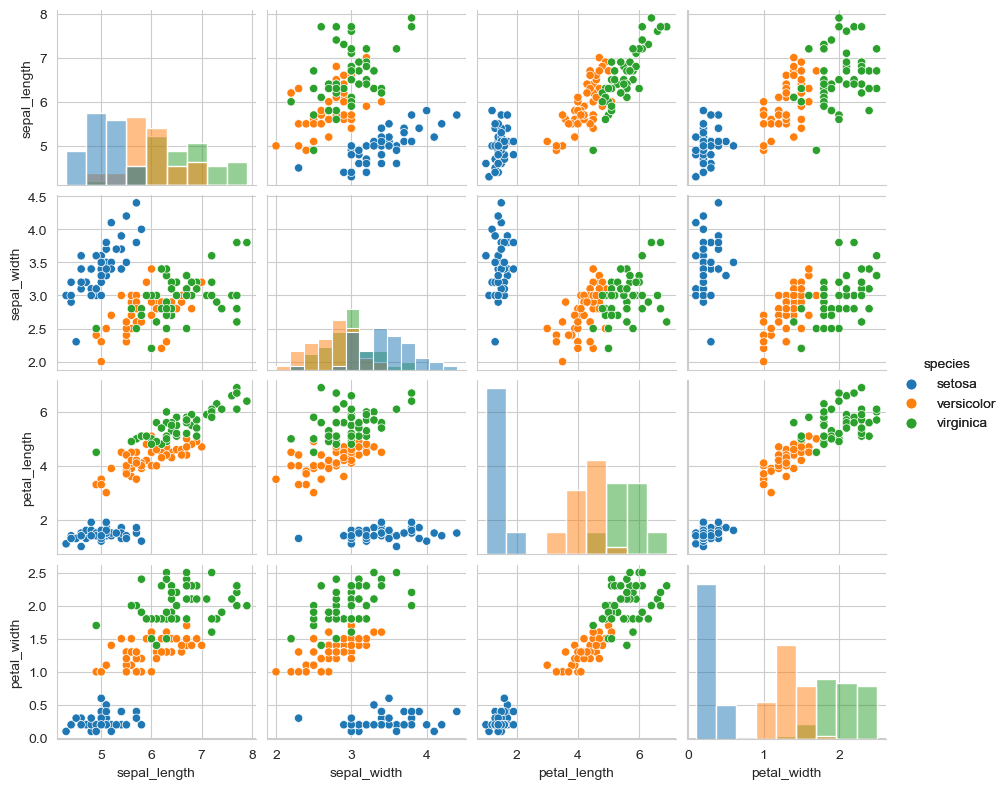

In [17]:
sns.set_style("whitegrid")              #pair plot
sns.pairplot(iris, hue="species", height=2, diag_kind="hist").add_legend()
plt.show()

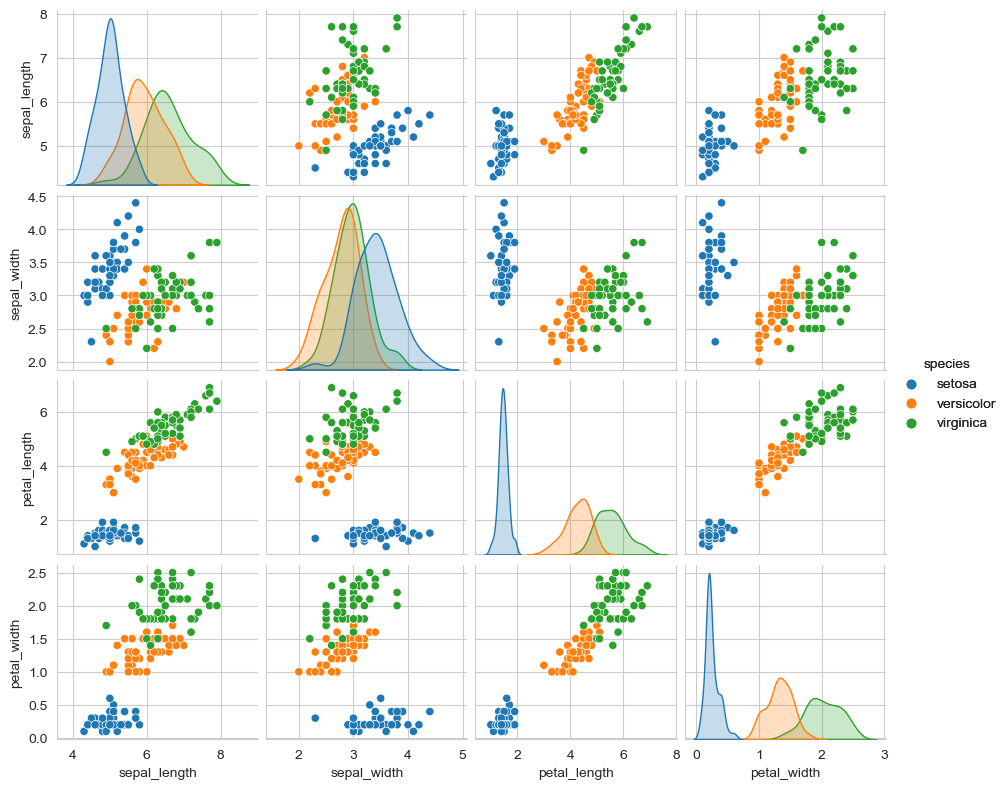

In [18]:
sns.set_style("whitegrid")              #pair plot
sns.pairplot(iris, hue="species", height=2).add_legend()
plt.show()

### Box Plot


<AxesSubplot:ylabel='sepal_length'>

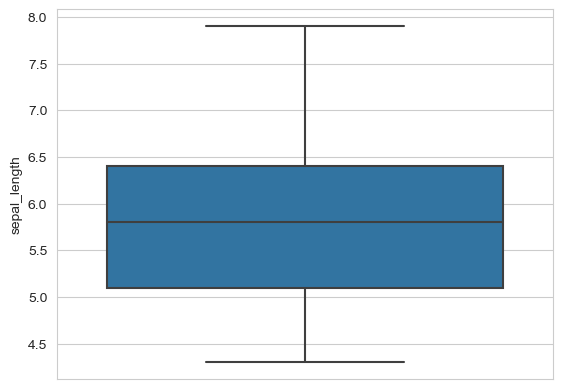

In [19]:
sns.boxplot(y="sepal_length", data=iris)

<AxesSubplot:ylabel='petal_length'>

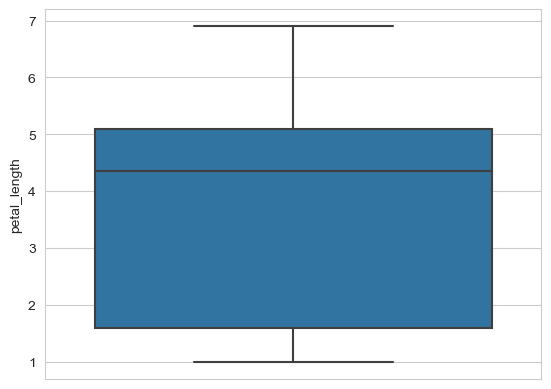

In [20]:
sns.boxplot(y="petal_length", data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

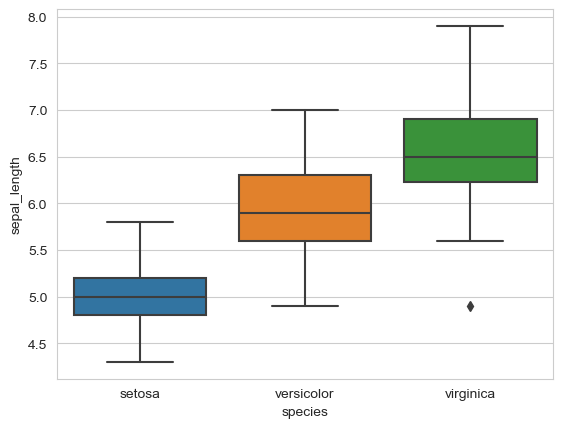

In [21]:
sns.boxplot(x="species", y="sepal_length", data=iris)

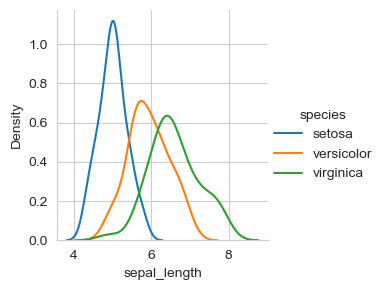

In [22]:
#K ernel Distribution Estimate
sns.FacetGrid(iris, hue="species", height=3)\
.map(sns.kdeplot,"sepal_length")\
.add_legend()
plt.show()

### Line Plot

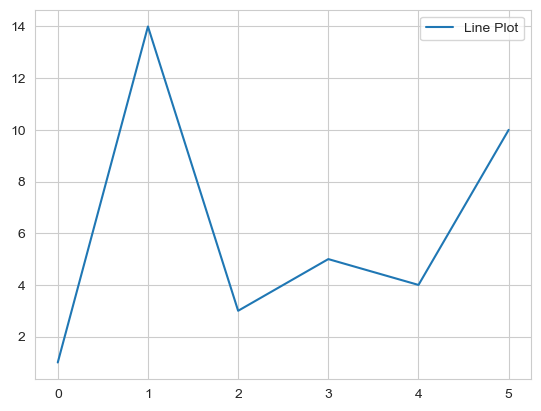

In [23]:
y=[1,14,3,5,4,10]
plt.plot(y,label="Line Plot")
plt.legend()
plt.show()

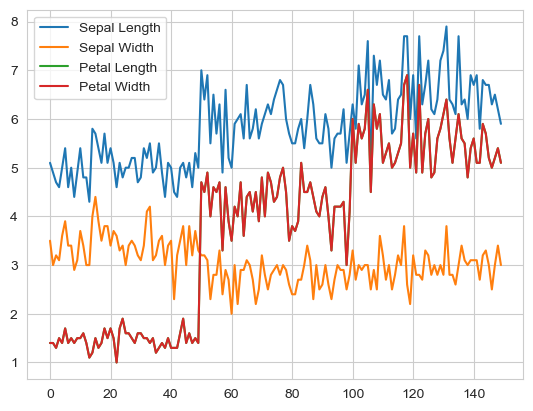

In [24]:
plt.plot(iris['sepal_length'],label='Sepal Length')
plt.plot(iris['sepal_width'],label='Sepal Width')
plt.plot(iris['petal_length'],label='Petal Length')
plt.plot(iris['petal_length'],label='Petal Width')
plt.legend()
plt.show()

In [25]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Correlation is a descriptive method,that tells us a leneal relationship between two features.
And its value is always between -1 and +1. It's value indicates, strength and direction of relationship.

<AxesSubplot:>

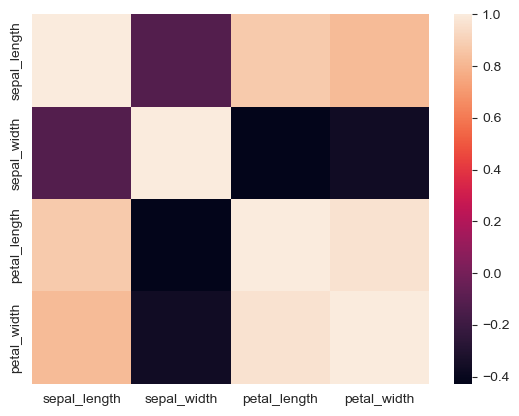

In [26]:
sns.heatmap(iris.corr())

<AxesSubplot:>

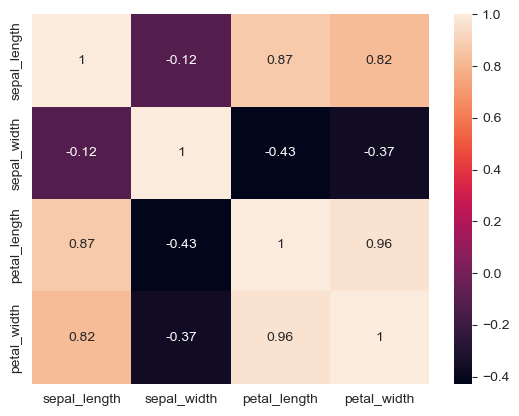

In [27]:
sns.heatmap(iris.corr(), annot=True)

annot – an array of the same shape as data which is used to annotate the heatmap.

annot: If True, write the data value in each cell.

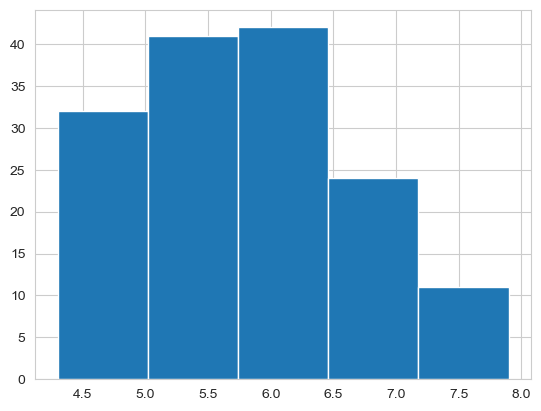

In [28]:
plt.hist(iris['sepal_length'], bins=5)
plt.show()

bins are basically the no. of intervals in which, our data would be divided.

In [29]:
iris['sepal_length'].min()

4.3

In [30]:
iris['sepal_length'].max()

7.9

## Training & Testing

In [31]:
X=iris.drop(['species'], axis=1)

In [32]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
Y=iris['species']

In [34]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Machine cant understand characters, so we need to convert setosa, virginica,versicolor as numbers(numeric values).
We'll use Label Encoder to convert these characters into values.


In [35]:
le= LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Training the data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.2)

#### Add random_state to the train_test_split

The random state hyperparameter in the train_test_split() function controls the shuffling process.
With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.
With random_state=0 , we get the same train and test sets across different executions.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, random_state=1)

## Logistic Regression

In [38]:
lr=LogisticRegression(solver='newton-cg')

In [39]:
lr.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [40]:
y_pred1=lr.predict(X_test)

Get the confusion matrix

In [41]:
confusion_matrix(y_test, y_pred1)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

Text(0.5, 25.52222222222222, 'Predicted label')

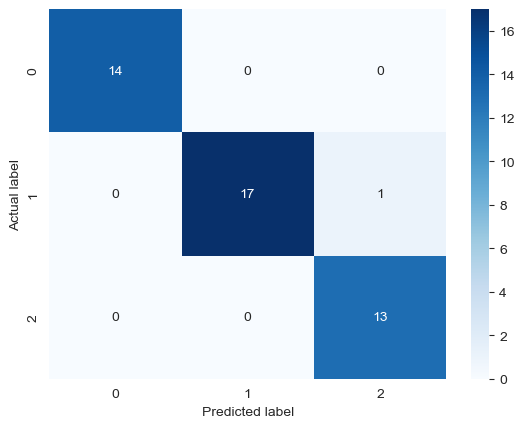

In [42]:
sns.heatmap(data=confusion_matrix(y_test, y_pred1), annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Get Accuracy Score

In [43]:
accuracy_score(y_test,y_pred1)

0.9777777777777777

## Decision Tree

In [44]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred2 = dtree.predict(X_test)

Get the Confusion Matrix, heatmap for confusion matrix and accuracy score

In [47]:
confusion_matrix(y_test,y_pred2)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

Text(0.5, 25.52222222222222, 'Predicted label')

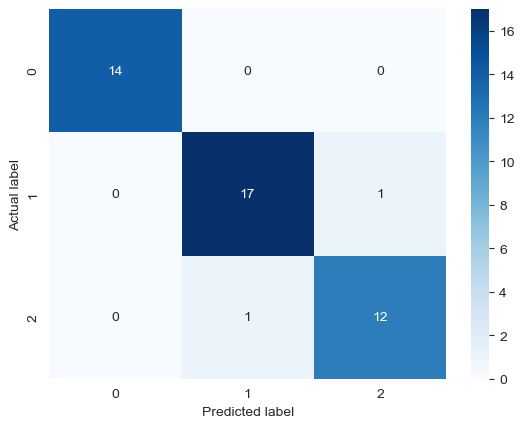

In [48]:
sns.heatmap(data=confusion_matrix(y_test, y_pred2), annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
accuracy_score(y_test,y_pred2)

0.9555555555555556

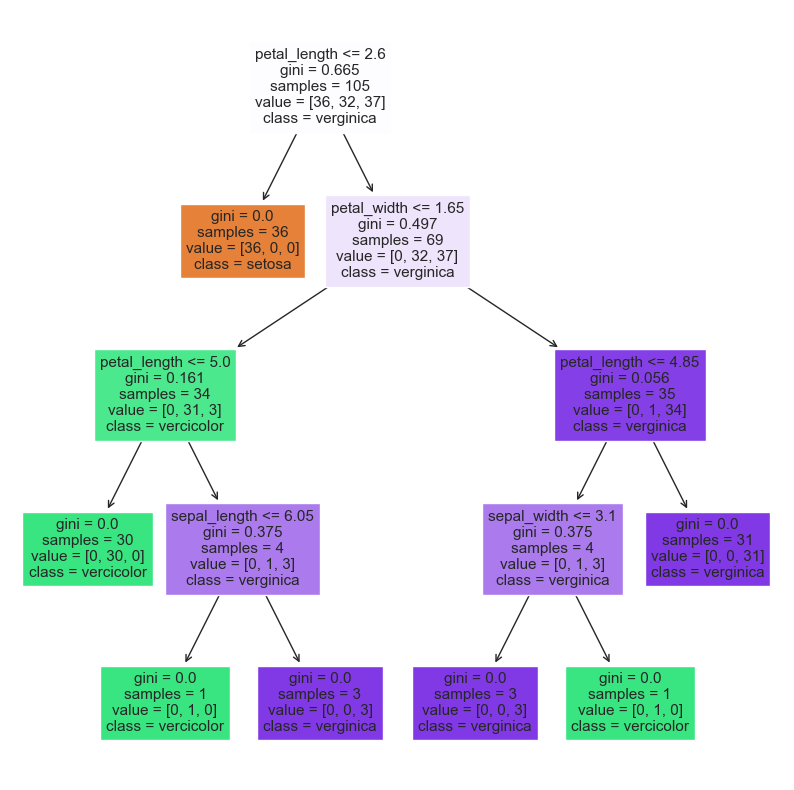

In [51]:
plt.figure(figsize=(10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = iris.columns[:-1], class_names = ["setosa", "vercicolor", "verginica"], filled = True)

## Random Forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf = RandomForestClassifier(n_estimators = 2000)

Use 100 decision trees in random forest

In [55]:
clf = RandomForestClassifier(n_estimators = 100)

In [56]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred3 = clf.predict(X_test)

Get the Confusion Matrix, heatmap for confusion matrix and accuracy score

In [58]:
confusion_matrix(y_test,y_pred3)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

Text(0.5, 25.52222222222222, 'Predicted label')

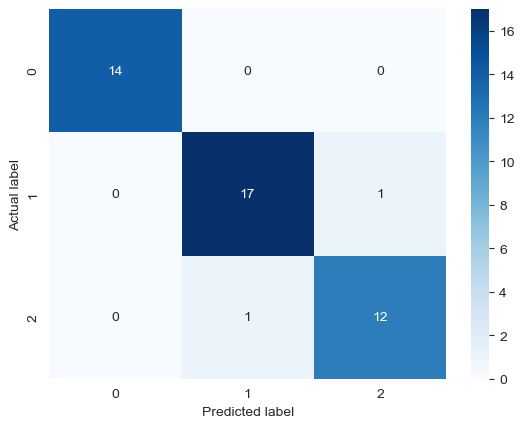

In [59]:
sns.heatmap(data=confusion_matrix(y_test, y_pred3), annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
accuracy_score(y_test,y_pred3)

0.9555555555555556